<a href="https://colab.research.google.com/github/Naoki0424/my_document/blob/main/20211023_keras_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerasによるロジスティック回帰の実装

## ライブラリのインポート

In [ ]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

np.random.seed(20211023)
tf.random.set_seed(20211023)

tensorflowのVariableの初期値に対しても乱数が生成されるため`tf.random.set_seed(20211023)`で乱数のシードを設定している。これにより実行毎に異なる乱数が設定されることを防ぐことができます

## 訓練データの作成

In [ ]:
n0, mu0, variance0 = 800, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2) * variance0, n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 600, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2) * variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

# データの結合
df = pd.concat([df0, df1], ignore_index=True)
# データのシャッフル
df = df.reindex(permutation(df.index)).reset_index(drop=True)

num_data = int(len(df)*0.8)
train_set = df[:num_data]
test_set = df[num_data:]

In [ ]:
test_set.head()

,x1,x2,t
1120,10.077012,12.342845,0
1121,18.804443,19.802745,1
1122,6.465107,12.773864,0
1123,16.967260,21.002124,1
1124,13.827500,24.960522,0


In [ ]:
train_set.head()

,x1,x2,t
0,20.812725,24.044027,1
1,6.235564,10.748443,0
2,8.079085,14.520625,0
3,16.273835,20.147193,1
4,10.897685,16.730143,1


In [ ]:
# 後続の処理を考慮し説明変数と目的変数に分解
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values
test_x = test_set[['x1', 'x2']].values
test_t = test_set['t'].values

In [ ]:
train_x

array([[20.81272503, 24.04402742],
       [ 6.23556359, 10.74844251],
       [ 8.07908461, 14.52062496],
       ...,
       [ 7.6272181 ,  5.40179946],
       [10.11426958,  8.13811419],
       [ 6.23102652, 14.94535981]])

In [ ]:
train_t

array([1, 0, 0, ..., 0, 0, 0])

## 予測値を計算する式を定義する

In [ ]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape=(2, ), name='logistic_regression'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
logistic_regression (Dense)  (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


`ayers.Dense()`は１次関数＋活性化関数(ここではσ()としています)を示しています。
`activation='sigmoid'`により活性化関数にシグモイド関数を設定しています。
数式に表すと以下です。

$$
P(x_{1}, x_{2}) = σ(w_{1}x_{1} + w_{2}x_{2} + b)
$$


シグモイド関数は0〜1の範囲で出力を行うため確率と解釈されることがあります。

Output Shape では出力するデータの形状を示しています。ここでは(None, 1)となっているため1つの確率が求まることが分かります

Param #では調整するパラメータの個数が分かります。ここでは重みが2つ、バイアスが1つです。


## 誤差関数を定義する

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

`optimizer='adam'`により、最適化アルゴリズムにAdamで設定、
loss='binary_crossentropy'により、誤差関数に交差エントロピーを設定しています。

`metrics=['acc']`によりモデルの性能評価に正解率（Accuracy）を設定しています。

## 学習を行う

In [ ]:
history = model.fit(train_x, train_t, 
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 446ms/step - loss: 5.7194 - acc: 0.4170 - val_loss: 5.1710 - val_acc: 0.4750
Epoch 2/10
1/1 [==============================] - 0s 29ms/step - loss: 5.7065 - acc: 0.4170 - val_loss: 5.1595 - val_acc: 0.4750
Epoch 3/10
1/1 [==============================] - 0s 22ms/step - loss: 5.6936 - acc: 0.4170 - val_loss: 5.1479 - val_acc: 0.4750
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 5.6808 - acc: 0.4170 - val_loss: 5.1364 - val_acc: 0.4750
Epoch 5/10
1/1 [==============================] - 0s 24ms/step - loss: 5.6679 - acc: 0.4170 - val_loss: 5.1248 - val_acc: 0.4750
Epoch 6/10
1/1 [==============================] - 0s 23ms/step - loss: 5.6551 - acc: 0.4170 - val_loss: 5.1132 - val_acc: 0.4750
Epoch 7/10
1/1 [==============================] - 0s 37ms/step - loss: 5.6422 - acc: 0.4170 - val_loss: 5.1017 - val_acc: 0.4750
Epoch 8/10
1/1 [==============================] - 0s 25ms/step - loss: 5.6293 - acc: 0.4170 - va

In [ ]:
history = model.fit(train_x, train_t, 
                    validation_data=(test_x, test_t),
                    batch_size=len(train_x), epochs=5000, verbose=0)

## 結果をグラフで描画

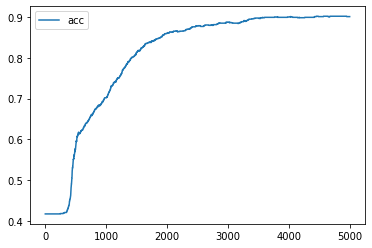

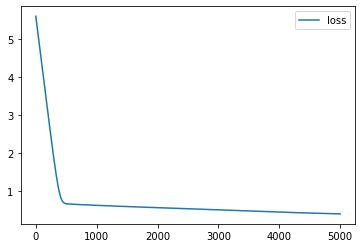

In [ ]:
DataFrame({'acc': history.history['acc']}).plot()
DataFrame({'loss': history.history['loss']}).plot()

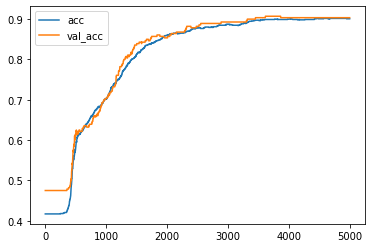

In [ ]:
DataFrame({'acc': history.history['acc'],
           'val_acc': history.history['val_acc']}).plot()

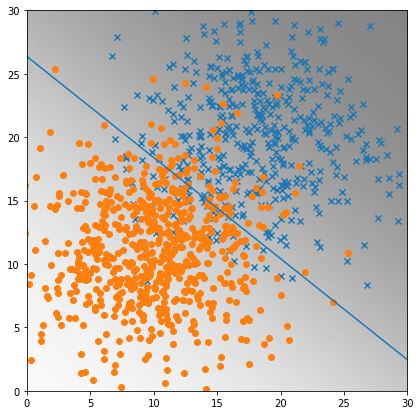

In [ ]:
# 調整を終えたパラメータを取得
[[w1], [w2]], [b] = model.get_weights()

train_set0 = train_set[train_set['t'] == 0]
train_set1 = train_set[train_set['t'] == 1]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])

# 訓練データの描画
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

# 境界線の描画
xs = np.linspace(0, 30, 10)
ys = - (w1*xs/w2 + b/w2)
subplot.plot(xs, ys)

# 濃淡の描画
field = [[1 / (1 + np.exp(-(w1*x1 + w2*x2 + b))) for x1 in np.linspace(0, 30, 100)] for x2 in np.linspace(0, 30, 100)]
subplot.imshow(field, origin='lower', extent=(0, 30, 0, 30), vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)
